In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# Intro

### Markov Poperty
$P(S_{t+1}\vert S_t, A_t) = P(S_{T+1}\vert S_t, A_t, S_{t-1}, A_{t-1},\ldots)$

### Transition Function
$p(s'\vert s, a) = P(S_t=s'\vert S_{t-1}=s, A_{t-1}=a)$

### Reward Function
$r(s,a)=\mathbb{E} [R_t\vert S_{t-1}=s, A_{t-1}=a]$<br>
$r(s,a,s')=\mathbb{E} [R_t\vert S_{t-1}=s, A_{t-1}=a, S_t=s']$

### Return
$G_t=R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+\ldots+\gamma^{T-1}R_T$

### MDP
$\mathcal{MDP(S,A,T,R,S_\theta,\gamma,H)}$<br>
$\mathcal{POMDP(S,A,T,R,S_\theta,\gamma,H,O,E)}$

# Bellman Equations

### State-Value Function
$v_\pi(s) = \sum_a [\pi(a|s) \sum_{s',r} [p(s',r|s, a) \left[r + \gamma v_\pi(s') \right],\forall s \in S]]$

### Action-Value Function
$q_\pi(s,a) = \sum_{s',r} p(s',r|s, a) \left[r + \gamma v_\pi(s') \right],\forall s \in S,\forall a \in A$

### Action Advantage
$a_\pi(s,a)=q_\pi(s,a)-v_\pi(s)$

### Bellman optimality equations

$v_\star(s)=\displaystyle\max_\pi v_\pi(s),\forall s \in S$<br>
$q_\star(s,a)=\sum_{s',r}p(s',r\vert s,a)[r+\gamma \displaystyle\max_{a'}q_\star(s',a')]$

# Policy Iteration

### Policy Evaluation
$v_{k+1}(s)=\sum_a \pi(a\vert s) \sum_{s',r}p(s',r\vert s,a)[r+\gamma v_k(s')]$

### Policy Improvement
$\pi'(s)=\text{argmax}_a \sum_{s',r}p(s',r\vert s,a)[r+\gamma v_k(s')]$

# Value Iteration
$v_{k+1}(s)=\displaystyle\max_a\sum_{s',r}p(s',r\vert s,a)[r+\gamma v_k(s')]$

In [5]:
def initialize_mdp(env):
    # state: {action: [(prob. of transition, next state, reward, if statement is terminal)]}
    if env == "rw":
        RW = {
            0: {
                0: [(1.0, 0, 0, True)],
                1: [(1.0, 0, 0, True)],
            },
            1: {
                0: [(0.5, 0, 0, True)],
                1: [(0.5, 2, 0, False)],
            },
            2: {
                0: [(0.5, 1, 0, False)],
                1: [(0.5, 3, 0, False)],
            },
            3: {
                0: [(0.5, 2, 0, False)],
                1: [(0.5, 4, 0, False)],
            },
            4: {
                0: [(0.5, 3, 0, False)],
                1: [(0.5, 5, 0, False)],
            },
            5: {
                0: [(0.5, 4, 0, False)],
                1: [(0.5, 6, 1, True)],
            },
            6: {
                0: [(1.0, 6, 0, True)],
                1: [(1.0, 6, 0, True)],
            },
        }

        LEFT, RIGHT = 0, 1
        pi = lambda s: {0: LEFT, 1: LEFT}[s]
        return RW, pi

    if env == "bsw":
        BSW = {
            0: [
                (0.8, 0, 0.0, True),
                (0.2, 2, 1.0, True),
            ],
            1: [
                (0.2, 0, 0.0, True),
                (0.8, 2, 1.0, True),
            ],
        }

        LEFT, RIGHT = 0, 1
        pi = lambda s: {0: LEFT, 1: LEFT}[s]
        return BSW, pi

    if env == "fl":
        FL = {
            0: {
                0: [
                    (0.3333, 0, 0.0, False),
                    (0.3333, 0, 0.0, False),
                    (0.3333, 4, 0.0, False),
                ],
                1: [
                    (0.3333, 0, 0.0, False),
                    (0.3333, 4, 0.0, False),
                    (0.3333, 1, 0.0, False),
                ],
                2: [
                    (0.3333, 4, 0.0, False),
                    (0.3333, 1, 0.0, False),
                    (0.3333, 0, 0.0, False),
                ],
                3: [
                    (0.3333, 1, 0.0, False),
                    (0.3333, 0, 0.0, False),
                    (0.3333, 0, 0.0, False),
                ],
            },
            1: {
                0: [
                    (0.3333, 1, 0.0, False),
                    (0.3333, 0, 0.0, False),
                    (0.3333, 5, 0.0, True),
                ],
                1: [
                    (0.3333, 0, 0.0, False),
                    (0.3333, 5, 0.0, True),
                    (0.3333, 2, 0.0, False),
                ],
                2: [
                    (0.3333, 5, 0.0, True),
                    (0.3333, 2, 0.0, False),
                    (0.3333, 1, 0.0, False),
                ],
                3: [
                    (0.3333, 2, 0.0, False),
                    (0.3333, 1, 0.0, False),
                    (0.3333, 0, 0.0, False),
                ],
            },
            2: {
                0: [
                    (0.3333, 2, 0.0, False),
                    (0.3333, 1, 0.0, False),
                    (0.3333, 6, 0.0, False),
                ],
                1: [
                    (0.3333, 1, 0.0, False),
                    (0.3333, 6, 0.0, False),
                    (0.3333, 3, 0.0, False),
                ],
                2: [
                    (0.3333, 6, 0.0, False),
                    (0.3333, 3, 0.0, False),
                    (0.3333, 2, 0.0, False),
                ],
                3: [
                    (0.3333, 3, 0.0, False),
                    (0.3333, 2, 0.0, False),
                    (0.3333, 1, 0.0, False),
                ],
            },
            3: {
                0: [
                    (0.3333, 3, 0.0, False),
                    (0.3333, 2, 0.0, False),
                    (0.3333, 7, 0.0, True),
                ],
                1: [
                    (0.3333, 2, 0.0, False),
                    (0.3333, 7, 0.0, True),
                    (0.3333, 3, 0.0, False),
                ],
                2: [
                    (0.3333, 7, 0.0, True),
                    (0.3333, 3, 0.0, False),
                    (0.3333, 3, 0.0, False),
                ],
                3: [
                    (0.3333, 3, 0.0, False),
                    (0.3333, 3, 0.0, False),
                    (0.3333, 2, 0.0, False),
                ],
            },
            4: {
                0: [
                    (0.3333, 0, 0.0, False),
                    (0.3333, 4, 0.0, False),
                    (0.3333, 8, 0.0, False),
                ],
                1: [
                    (0.3333, 4, 0.0, False),
                    (0.3333, 8, 0.0, False),
                    (0.3333, 5, 0.0, True),
                ],
                2: [
                    (0.3333, 8, 0.0, False),
                    (0.3333, 5, 0.0, True),
                    (0.3333, 0, 0.0, False),
                ],
                3: [
                    (0.3333, 5, 0.0, True),
                    (0.3333, 0, 0.0, False),
                    (0.3333, 4, 0.0, False),
                ],
            },
            5: {
                0: [(1.0, 5, 0, True)],
                1: [(1.0, 5, 0, True)],
                2: [(1.0, 5, 0, True)],
                3: [(1.0, 5, 0, True)],
            },
            6: {
                0: [
                    (0.3333, 2, 0.0, False),
                    (0.3333, 5, 0.0, True),
                    (0.3333, 10, 0.0, False),
                ],
                1: [
                    (0.3333, 5, 0.0, True),
                    (0.3333, 10, 0.0, False),
                    (0.3333, 7, 0.0, True),
                ],
                2: [
                    (0.3333, 10, 0.0, False),
                    (0.3333, 7, 0.0, True),
                    (0.3333, 2, 0.0, False),
                ],
                3: [
                    (0.3333, 7, 0.0, True),
                    (0.3333, 2, 0.0, False),
                    (0.3333, 5, 0.0, True),
                ],
            },
            7: {
                0: [(1.0, 7, 0, True)],
                1: [(1.0, 7, 0, True)],
                2: [(1.0, 7, 0, True)],
                3: [(1.0, 7, 0, True)],
            },
            8: {
                0: [
                    (0.3333, 4, 0.0, False),
                    (0.3333, 8, 0.0, False),
                    (0.3333, 12, 0.0, True),
                ],
                1: [
                    (0.3333, 8, 0.0, False),
                    (0.3333, 12, 0.0, True),
                    (0.3333, 9, 0.0, False),
                ],
                2: [
                    (0.3333, 12, 0.0, True),
                    (0.3333, 9, 0.0, False),
                    (0.3333, 4, 0.0, False),
                ],
                3: [
                    (0.3333, 9, 0.0, False),
                    (0.3333, 4, 0.0, False),
                    (0.3333, 8, 0.0, False),
                ],
            },
            9: {
                0: [
                    (0.3333, 5, 0.0, True),
                    (0.3333, 8, 0.0, False),
                    (0.3333, 13, 0.0, False),
                ],
                1: [
                    (0.3333, 8, 0.0, False),
                    (0.3333, 13, 0.0, False),
                    (0.3333, 10, 0.0, False),
                ],
                2: [
                    (0.3333, 13, 0.0, False),
                    (0.3333, 10, 0.0, False),
                    (0.3333, 5, 0.0, True),
                ],
                3: [
                    (0.3333, 10, 0.0, False),
                    (0.3333, 5, 0.0, True),
                    (0.3333, 8, 0.0, False),
                ],
            },
            10: {
                0: [
                    (0.3333, 6, 0.0, False),
                    (0.3333, 9, 0.0, False),
                    (0.3333, 14, 0.0, False),
                ],
                1: [
                    (0.3333, 9, 0.0, False),
                    (0.3333, 14, 0.0, False),
                    (0.3333, 11, 0.0, True),
                ],
                2: [
                    (0.3333, 14, 0.0, False),
                    (0.3333, 11, 0.0, True),
                    (0.3333, 6, 0.0, False),
                ],
                3: [
                    (0.3333, 11, 0.0, True),
                    (0.3333, 6, 0.0, False),
                    (0.3333, 9, 0.0, False),
                ],
            },
            11: {
                0: [(1.0, 11, 0, True)],
                1: [(1.0, 11, 0, True)],
                2: [(1.0, 11, 0, True)],
                3: [(1.0, 11, 0, True)],
            },
            12: {
                0: [(1.0, 12, 0, True)],
                1: [(1.0, 12, 0, True)],
                2: [(1.0, 12, 0, True)],
                3: [(1.0, 12, 0, True)],
            },
            13: {
                0: [
                    (0.3333, 9, 0.0, False),
                    (0.3333, 12, 0.0, True),
                    (0.3333, 13, 0.0, False),
                ],
                1: [
                    (0.3333, 12, 0.0, True),
                    (0.3333, 13, 0.0, False),
                    (0.3333, 14, 0.0, False),
                ],
                2: [
                    (0.3333, 13, 0.0, False),
                    (0.3333, 14, 0.0, False),
                    (0.3333, 9, 0.0, False),
                ],
                3: [
                    (0.3333, 14, 0.0, False),
                    (0.3333, 9, 0.0, False),
                    (0.3333, 12, 0.0, True),
                ],
            },
            14: {
                0: [
                    (0.3333, 10, 0.0, False),
                    (0.3333, 13, 0.0, False),
                    (0.3333, 14, 0.0, False),
                ],
                1: [
                    (0.3333, 13, 0.0, False),
                    (0.3333, 14, 0.0, False),
                    (0.3333, 15, 1.0, True),
                ],
                2: [
                    (0.3333, 14, 0.0, False),
                    (0.3333, 15, 1.0, True),
                    (0.3333, 10, 0.0, False),
                ],
                3: [
                    (0.3333, 15, 1.0, True),
                    (0.3333, 10, 0.0, False),
                    (0.3333, 13, 0.0, False),
                ],
            },
            15: {
                0: [(1.0, 15, 0, True)],
                1: [(1.0, 15, 0, True)],
                2: [(1.0, 15, 0, True)],
                3: [(1.0, 15, 0, True)],
            },
        }

        LEFT, DOWN, RIGHT, UP = 0, 1, 2, 3

        pi = lambda s: {
            0: UP,
            1: UP,
            2: UP,
            3: UP,
            4: LEFT,
            5: UP,
            6: UP,
            7: UP,
            8: UP,
            9: DOWN,
            10: LEFT,
            11: LEFT,
            12: LEFT,
            13: RIGHT,
            14: RIGHT,
            15: LEFT,
        }[s]

        return FL, pi

In [6]:
def print_pi(pi):
    for i in range(0, 16, 4):
        k, l, m, n = [pi(_) for _ in range(i, i + 4)]
        d = {0: "←", 1: "↓", 2: "→", 3: "↑"}
        print(d[k], d[l], d[m], d[n])


def print_V(V):
    for i in range(0, 16, 4):
        print(
            round(V[i], 3), round(V[i + 1], 3), round(V[i + 2], 3), round(V[i + 3], 3)
        )


def print_pi_V(pi, V, iteration):
    print()
    print(iteration)
    print_V(V)
    print_pi(pi)

In [7]:
def policy_evaluation(pi, P, gamma=1.0, theta=1e-5):
    prev_V = np.zeros(len(P))
    iteration = 0
    while True:
        V = np.zeros(len(P))
        for s in range(len(P)):
            for prob, next_state, reward, done in P[s][pi(s)]:
                V[s] += prob * (reward + gamma * prev_V[next_state] * (not done))
        if np.max(np.abs(prev_V - V)) < theta:
            break
        prev_V = V.copy()
        iteration += 1
    return V, iteration


def policy_improvement(V, P, gamma=1.0):
    Q = np.zeros((len(P), len(P[0])), dtype=np.float64)
    for s in range(len(P)):
        for a in range(len(P[s])):
            for prob, next_state, reward, done in P[s][a]:
                Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
    new_pi = lambda s: {s: a for s, a in enumerate(np.argmax(Q, axis=1))}[s]
    return new_pi

In [8]:
def policy_iteration(P, pi):
    prev_V = np.zeros(len(P))
    theta = 1e-10
    iteration = 0
    while True:
        V, i = policy_evaluation(pi, P)
        iteration += i

        if np.max(np.abs(V - prev_V)) < theta:
            break
        prev_V = V

        print_pi_V(pi, V, iteration)

        pi = policy_improvement(V, P)
    return V, pi, iteration


def value_iteration(P, gamma=1.0, theta=1e-5):
    V = np.zeros(len(P), dtype=np.float64)
    iteration = 0
    while True:
        Q = np.zeros((len(P), len(P[0])), dtype=np.float64)

        for s in range(len(P)):
            for a in range(len(P[s])):
                for prob, next_state, reward, done in P[s][a]:
                    Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
        iteration += 1
        if iteration % 100 == 0:
            pi = lambda s: {s: a for s, a in enumerate(np.argmax(Q, axis=1))}[s]
            print_pi_V(pi, V, iteration)
        if np.max(np.abs(V - np.max(Q, axis=1))) < theta:
            break
        V = np.max(Q, axis=1)
    pi = lambda s: {s: a for s, a in enumerate(np.argmax(Q, axis=1))}[s]
    return V, pi, iteration

In [9]:
print("POLICY ITERATION")
P, pi = initialize_mdp("fl")
V_PI, pi_PI, iterations_PI = policy_iteration(P, pi)

POLICY ITERATION

54
0.0 0.0 0.0 0.0
0.125 0.0 0.0 0.0
0.25 0.375 0.35 0.0
0.0 0.525 0.675 0.0
↑ ↑ ↑ ↑
← ↑ ↑ ↑
↑ ↓ ← ←
← → → ←

307
0.751 0.375 0.359 0.18
0.751 0.0 0.343 0.0
0.751 0.752 0.671 0.0
0.0 0.834 0.917 0.0
← ← ← ←
← ← ← ←
↑ ↓ ← ←
← → ↓ ←

571
0.777 0.655 0.534 0.534
0.777 0.0 0.413 0.0
0.778 0.778 0.706 0.0
0.0 0.852 0.926 0.0
← ↑ ← ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←

908
0.819 0.818 0.818 0.818
0.82 0.0 0.527 0.0
0.82 0.821 0.762 0.0
0.0 0.88 0.94 0.0
← ↑ ↑ ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←


In [10]:
print("VALUE ITERATION")
V_VI, pi_VI, iterations_VI = value_iteration(P)

VALUE ITERATION

100
0.739 0.712 0.693 0.683
0.745 0.0 0.47 0.0
0.757 0.774 0.721 0.0
0.0 0.847 0.923 0.0
← ↑ ↑ ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←

200
0.813 0.81 0.808 0.807
0.813 0.0 0.522 0.0
0.815 0.817 0.759 0.0
0.0 0.878 0.939 0.0
← ↑ ↑ ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←

300
0.819 0.818 0.817 0.817
0.819 0.0 0.526 0.0
0.82 0.821 0.762 0.0
0.0 0.88 0.94 0.0
← ↑ ↑ ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←


In [11]:
print("PI iterations:", iterations_PI, "\nVI iterations:", iterations_VI)
print(
    "VI policy == PI policy:",
    [round(pi_VI(_), 4) == round(pi_PI(_), 4) for _ in range(16)],
)
print(
    "VI values == PI values:",
    [round(V_VI[_], 4) == round(V_PI[_], 4) for _ in range(16)],
)

print_pi(pi_PI)
print_V(V_PI)

PI iterations: 1245 
VI iterations: 336
VI policy == PI policy: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
VI values == PI values: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
← ↑ ↑ ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←
0.819 0.818 0.818 0.818
0.82 0.0 0.527 0.0
0.82 0.821 0.762 0.0
0.0 0.88 0.94 0.0


# Total Regret

$\mathcal{T}=\sum_{e=1}^E \mathbb{E}[v_\star-q_\star(A_e)]$

# Softmax Exploration

$\pi(a)=\frac{exp(\frac{Q(a)}{\mathcal{T}})}{\sum_{b=0}^B exp(\frac{Q(b)}{\mathcal{T}})}$

# Evaluative Feedback

In [15]:
P, pi = initialize_mdp("bsw")

In [16]:
def pure_exploration(P):
    Q = np.zeros((len(P)))
    N = np.zeros((len(P)))
    total_return = 0

    for e in range(100):
        # if e % 10 == 0: print(N, Q)
        action = random.randint(0, 1)
        p0, _, r0, _ = P[action][0]
        p1, _, r1, _ = P[action][1]
        if random.uniform(0, 1) <= p0:
            reward = r0
        else:
            reward = r1

        total_return += reward

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
    return Q, N, total_return


pure_exploration(P)

(array([0.13333333, 0.925     ]), array([60., 40.]), 45.0)

In [17]:
def epsilon_greedy(P, epsilon):
    Q = np.zeros((len(P)))
    N = np.zeros((len(P)))
    total_return = 0

    for e in range(100):
        # if e % 10 == 0: print(N, Q)
        if np.random.random() > epsilon:
            action = np.argmax(Q)
        else:
            action = np.random.randint(len(Q))
        p0, _, r0, _ = P[action][0]
        p1, _, r1, _ = P[action][1]
        if random.uniform(0, 1) <= p0:
            reward = r0
        else:
            reward = r1
        total_return += reward

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
    return Q, N, total_return


epsilon_greedy(P, epsilon=0.1)

(array([0.14285714, 0.84883721]), array([14., 86.]), 75.0)

[20.06, 41.26, 53.96, 58.64, 60.77, 66.15, 66.85, 64.44, 68.25, 67.25, 67.11, 68.08, 67.97, 68.17, 68.3, 65.81, 67.76, 67.01, 65.75, 65.88, 66.01, 65.7, 64.84, 63.71, 64.77, 63.72, 62.73, 62.45, 61.28, 61.59, 61.82, 59.65, 60.18, 59.02, 59.16, 59.11, 57.53, 57.82, 56.41, 56.12, 55.77, 54.77, 54.04, 53.45, 53.37, 52.29, 52.48, 52.34, 51.76, 50.28, 49.39]


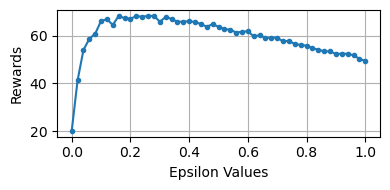

In [18]:
# comparing diff values of epsilon to find balance between exploitation and exploration
rewards = []
eps_values = []
for _ in range(0, 51):
    eps = _ / 50
    eps_values.append(eps)
    return_for_eps = 0
    for _ in range(100):
        _, _, r = epsilon_greedy(P, epsilon=eps)
        return_for_eps += r
    rewards.append(return_for_eps / 100)

print(rewards)
plt.figure(figsize=(4, 2))
plt.plot(eps_values, rewards, marker="o", markersize=3, linestyle="-", label="Values")
plt.xlabel("Epsilon Values")
plt.ylabel("Rewards")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
def optimistic_initialization(P):
    Q = np.full((len(P)), 1.0)
    N = np.full((len(P)), 1)
    total_return = 0

    for e in range(100):
        # if e % 10 == 0: print(Q, N)
        action = np.argmax(Q)
        p0, _, r0, _ = P[action][0]
        p1, _, r1, _ = P[action][1]
        if random.uniform(0, 1) <= p0:
            reward = r0
        else:
            reward = r1
        total_return += reward

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
    return Q, N, total_return


optimistic_initialization(P)

(array([0.5 , 0.79]), array([  2, 100]), 78.0)

In [20]:
def softmax_strategy(P, init_temp=1000.0, min_temp=0.01, decay_ratio=0.04):
    Q = np.zeros((len(P)))
    N = np.zeros((len(P)))
    total_return = 0
    n_episodes = 10000

    for e in range(n_episodes):
        # if e % 1000 == 0: print(Q, N)

        decay_episodes = n_episodes * decay_ratio
        temp = 1 - e / decay_episodes
        temp *= init_temp - min_temp
        temp += min_temp
        temp = np.clip(temp, min_temp, init_temp)
        scaled_Q = Q / temp
        norm_Q = scaled_Q - np.max(scaled_Q)
        exp_Q = np.exp(norm_Q)
        probs = exp_Q / np.sum(exp_Q)
        action = np.random.choice(np.arange(len(probs)), size=1, p=probs)[0]

        p0, _, r0, _ = P[action][0]
        p1, _, r1, _ = P[action][1]
        if random.uniform(0, 1) <= p0:
            reward = r0
        else:
            reward = r1
        total_return += reward

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
    return Q, N, total_return


softmax_strategy(P)

(array([0.21875   , 0.80464927]), array([ 192., 9808.]), 7934.0)

In [21]:
def upper_confidence_bound(P, c=200):
    Q = np.zeros((len(P)))
    N = np.zeros((len(P)))
    total_return = 0
    n_episodes = 10000
    for e in range(n_episodes):
        # if e % 1000 == 0: print(Q, N)

        if e < len(Q):
            action = e
        else:
            U = np.sqrt(c * np.log(e) / N)
            action = np.argmax(Q + U)
        p0, _, r0, _ = P[action][0]
        p1, _, r1, _ = P[action][1]
        if random.uniform(0, 1) <= p0:
            reward = r0
        else:
            reward = r1
        total_return += reward

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
    return Q, N, total_return


upper_confidence_bound(P)

(array([0.20221266, 0.7975636 ]), array([1627., 8373.]), 7007.0)

In [22]:
def thompson_sampling(P, alpha=1, beta=0.1, c=200):
    Q = np.zeros((len(P)))
    N = np.zeros((len(P)))
    total_return = 0
    n_episodes = 10000
    for e in range(n_episodes):
        # if e % 1000 == 0: print(Q, N)

        samples = np.random.normal(loc=Q, scale=alpha / (np.sqrt(N) + beta))
        action = np.argmax(samples)

        p0, _, r0, _ = P[action][0]
        p1, _, r1, _ = P[action][1]
        if random.uniform(0, 1) <= p0:
            reward = r0
        else:
            reward = r1
        total_return += reward

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
    return Q, N, total_return


thompson_sampling(P)

(array([0.21428571, 0.79743281]), array([  28., 9972.]), 7958.0)

# Estimating values of policies

### Monte Carlo Learning

In [25]:
P, pi = initialize_mdp("rw")

In [26]:
def generate_trajectory(P, max_steps=100):
    done, trajectory = False, []
    while not done:
        t = 0
        state = 3  # since we start from middle of env
        while True:
            action = random.randint(0, 1)  # since prob. for both is 0.5
            _, next_state, reward, done = P[state][action][0]
            experience = (state, action, reward, next_state, done)
            trajectory.append(experience)
            if done:
                break
            if t >= max_steps - 1:
                trajectory = []
                break
            state = next_state
            t += 1
    return np.array(trajectory)


generate_trajectory(P)

array([[3, 1, 0, 4, 0],
       [4, 0, 0, 3, 0],
       [3, 1, 0, 4, 0],
       [4, 1, 0, 5, 0],
       [5, 0, 0, 4, 0],
       [4, 0, 0, 3, 0],
       [3, 0, 0, 2, 0],
       [2, 1, 0, 3, 0],
       [3, 1, 0, 4, 0],
       [4, 0, 0, 3, 0],
       [3, 1, 0, 4, 0],
       [4, 0, 0, 3, 0],
       [3, 1, 0, 4, 0],
       [4, 1, 0, 5, 0],
       [5, 0, 0, 4, 0],
       [4, 0, 0, 3, 0],
       [3, 1, 0, 4, 0],
       [4, 0, 0, 3, 0],
       [3, 0, 0, 2, 0],
       [2, 0, 0, 1, 0],
       [1, 1, 0, 2, 0],
       [2, 0, 0, 1, 0],
       [1, 1, 0, 2, 0],
       [2, 0, 0, 1, 0],
       [1, 0, 0, 0, 1]])

In [27]:
def mc_prediction(P, pi, first_visit=True):
    n_eps = 1000

    gamma = 0.99
    init_alpha = 0.3
    min_alpha = 0.01
    alphas = np.array([max(init_alpha**i, min_alpha) for i in range(n_eps)])

    V = np.zeros((7))
    V_track = np.zeros((n_eps, 7))
    for e in range(n_eps):
        trajectory = generate_trajectory(P)
        visited = np.zeros((7))
        for t, (state, _, reward, _, _) in enumerate(trajectory):
            if visited[state] and first_visit:
                continue
            visited[state] = 1
            n_steps = len(trajectory[t:])
            discounts = np.array([gamma**i for i in range(n_steps)])
            G = np.sum(discounts[:n_steps] * trajectory[t:, 2])
            V[state] = V[state] + alphas[e] * (G - V[state])
        V_track[e] = V
    return V.copy(), V_track


V, _ = mc_prediction(P, pi)
V

array([0.        , 0.1343323 , 0.27349056, 0.43001903, 0.61639823,
       0.79995812, 0.        ])

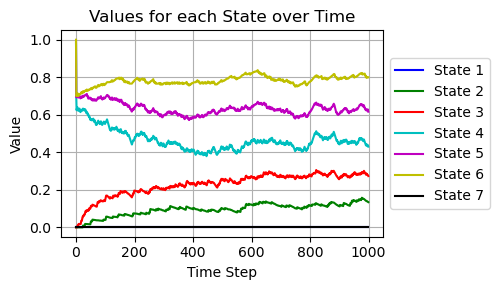

In [28]:
plt.figure(figsize=(6, 3))
colors = ["b", "g", "r", "c", "m", "y", "k"]

for i in range(7):
    plt.plot(_.T[i], label=f"State {i+1}", color=colors[i])

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Values for each State over Time")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()